### Building a Dataloader for Fashion Mnist Dataset

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import os
from torchvision import transforms 
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim






class FashionMnistDataset(Dataset):
    
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file, header = None)
        
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image = torch.tensor(row[1:].values, dtype = torch.float32).reshape(28, 28)
        label = torch.tensor(int(row[0]))
        return image, label
    
       
        
  
        
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])  

     
train_dataset = FashionMnistDataset(csv_file = 'fashion_mnist_train.csv', transform = transform)
# to get the first tuple from function getitem
print(train_dataset[0])

test_dataset = FashionMnistDataset(csv_file = 'fashion_mnist_test.csv', transform = transform )



(tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,
           0.,   1.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,   1.,   3.,
           4.,   0.,   0.,   3.],
        [  0.,   0.

#### building train_loader and test_loader

In [ ]:

#create train and test loader instance
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True, num_workers = 2) 
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False, num_workers = 2 )
for idx, (image, label) in enumerate(train_loader):
    if idx <= 3:
        
        print(idx, image, label)
    # if idx == 2:
        
    #     print(image)
    #     print(label)
    
    break




0 tensor([[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0., 34.,  ..., 40.,  5.,  0.],
         [ 0.,  0., 45.,  ..., 58., 33.,  0.],
         [ 0.,  0.,  0.,  ..., 47., 14.,  0.]],

        [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

        ...,

        [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0

### Visualize some of Images with dataloader

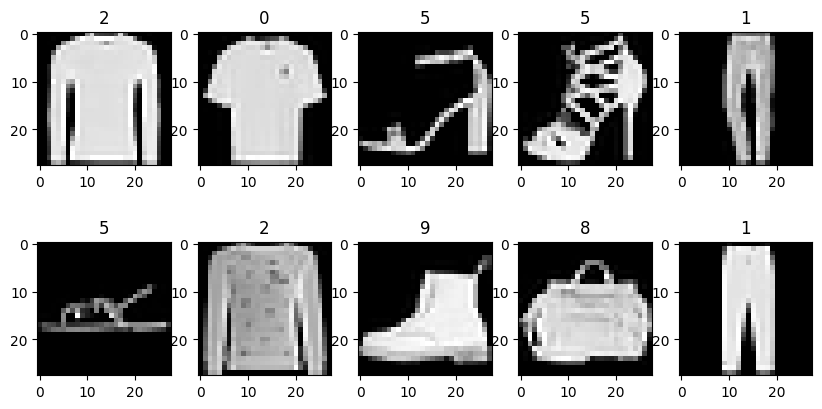

In [18]:
train_loader = DataLoader(train_dataset, batch_size = 5, shuffle = True, num_workers = 2) 
for image, label in train_loader:
    print(image, label)
    list_of_images = list(zip(image, label))
    sampled_images = random.sample(list_of_images, 10)
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in range(len(sampled_images)):
        image, label = sampled_images[i]
        image = image.squeeze().numpy()
        label = label.numpy()
        axes[i].imshow(image, cmap = 'gray')
        axes[i].set_title(label)
    plt.show()
    break

### Develop a Baseline Model for Classification from Scratch

- the model has two aspects:
- the feature extractraction frontend comprised of convolutional and pooling layers, and the classifier backend that will make a prediction
- for the convolutional front end we can start with a single convolutional layer with small filter of (3, 3) and a modest number of filters (32) followed by a max pooling layer.
- the filter maps then can be flattened to provide features to classifier.
- given that the problem is multiclass classification, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

- All layers will use the ReLU activation function.

We will use a learning rate of 0.001. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.

## Building a Baseline CNN model for classification of Fashion Mnist Dataset from Scratch

Epoch 1, Train Loss: 0.7026, Train Accuracy: 0.7322, Val Loss: 0.5808, Val Accuracy: 0.7793, Test Precision: 0.7734, Test Recall: 0.7793, Test F1: 0.7697
Epoch 2, Train Loss: 0.5209, Train Accuracy: 0.8049, Val Loss: 0.4766, Val Accuracy: 0.8024, Test Precision: 0.7992, Test Recall: 0.8024, Test F1: 0.7988
Epoch 3, Train Loss: 0.4696, Train Accuracy: 0.8236, Val Loss: 0.4778, Val Accuracy: 0.8091, Test Precision: 0.8058, Test Recall: 0.8091, Test F1: 0.8057
Epoch 4, Train Loss: 0.4359, Train Accuracy: 0.8369, Val Loss: 0.4332, Val Accuracy: 0.8175, Test Precision: 0.8147, Test Recall: 0.8175, Test F1: 0.8146
Epoch 5, Train Loss: 0.4095, Train Accuracy: 0.8477, Val Loss: 0.4092, Val Accuracy: 0.8241, Test Precision: 0.8212, Test Recall: 0.8241, Test F1: 0.8214
Epoch 6, Train Loss: 0.3893, Train Accuracy: 0.8549, Val Loss: 0.4855, Val Accuracy: 0.8228, Test Precision: 0.8214, Test Recall: 0.8228, Test F1: 0.8215
Epoch 7, Train Loss: 0.3726, Train Accuracy: 0.8613, Val Loss: 0.3933, Val A

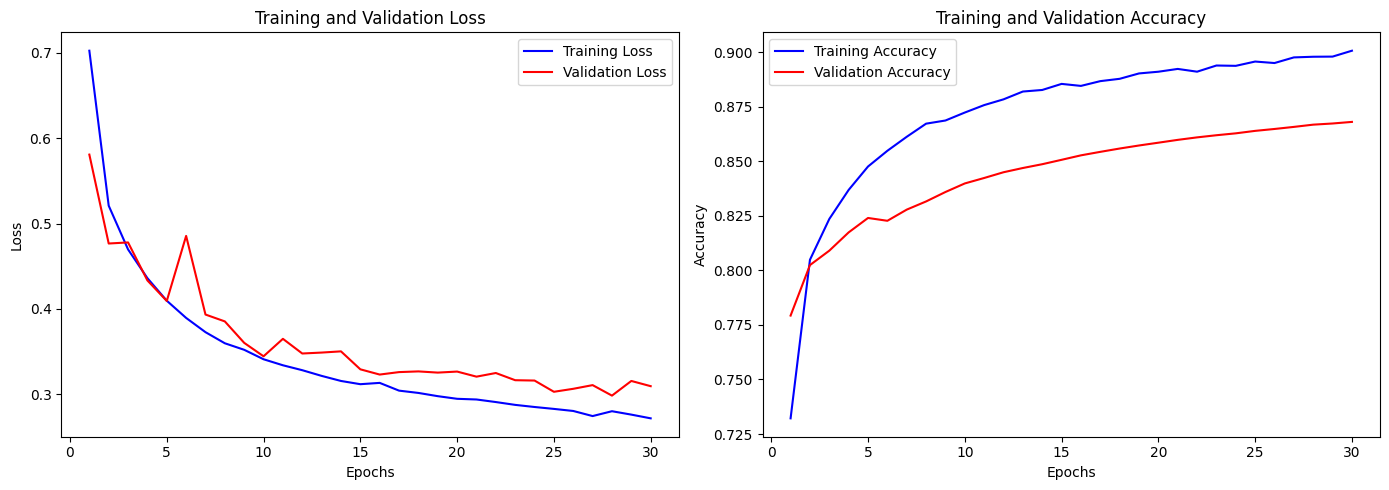

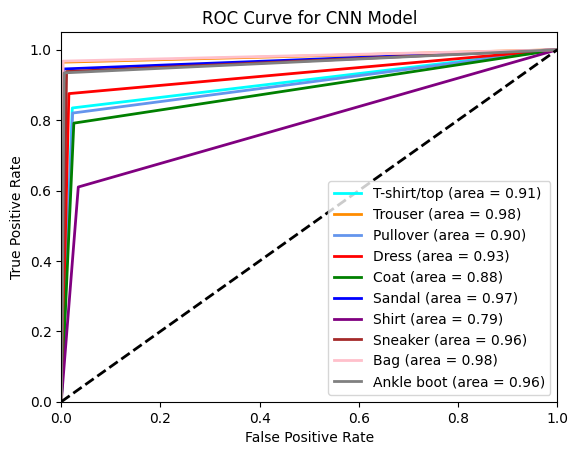

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import torch.nn.functional as F
import numpy as np



# Custom dataset for Fashion MNIST
class FashionMnistDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file, header=None)
        self.transform = transform

    def __len__(self):
        return len(self.data)
    #Get image and labels from dataset
    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image = row[1:].values.astype(np.uint8).reshape(28, 28)
        image = Image.fromarray(image)  # Convert to PIL Image for transformations
        label = torch.tensor(int(row[0]), dtype=torch.long)
        
        # Apply transformation if any
        if self.transform:
            image = self.transform(image)
            
        return image, label

# CNN architecture definition
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Define layers of the CNN
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        #Forward pass through CNN layers
        x = self.maxpool(F.relu(self.bn1(self.conv1(x))))
        x = self.maxpool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = FashionMnistDataset(csv_file='fashion_mnist_train.csv', transform=transform)
test_dataset = FashionMnistDataset(csv_file='fashion_mnist_test.csv', transform=transform)

#  create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Initialize lists to track metrics during training and validation
num_epochs = 30
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
test_precisions = []
test_recalls = []
test_f1_scores = []

all_val_labels = []
all_val_predictions = []

# training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # transfer inputs and labels to GPU if available
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        
    # Calculate average training loss and accuracy
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct_predictions / total_predictions
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            
            # calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            
            
            # Store predictions and labels for later evaluation
            all_val_labels.extend(labels.cpu().numpy())
            all_val_predictions.extend(predicted.cpu().numpy())
            
            
    # Calculate average validation loss and accuracy   
    val_loss = val_running_loss / len(test_loader.dataset)
    val_losses.append(val_loss)
    
    val_accuracy = accuracy_score(all_val_labels, all_val_predictions)
    val_accuracies.append(val_accuracy)
    
    
    # Calculate precision, recall, and F1-score for validation
    test_precision = precision_score(all_val_labels, all_val_predictions, average='weighted')
    test_recall = recall_score(all_val_labels, all_val_predictions, average='weighted')
    test_f1 = f1_score(all_val_labels, all_val_predictions, average='weighted')
    
    test_precisions.append(test_precision)
    test_recalls.append(test_recall)
    test_f1_scores.append(test_f1)
    
    
     # Print training and validation metrics for the current epoch
    print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    

# Plot training and validation loss/accuracy over epochs
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## ROC Curve plotting

# Class names dictionary
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Binarize the labels and predictions for ROC curve
y_test = label_binarize(all_val_labels, classes=range(10))
y_score = label_binarize(all_val_predictions, classes=range(10))


# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'brown', 'pink', 'grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()

### Building a ResNet-20 for Fashion mnist Classification

Epoch 1/30, Train Loss: 0.6781, Train Accuracy: 0.7515, Val Loss: 0.4904, Val Accuracy: 0.8247, Train Precision: 0.7462, Train Recall: 0.7515, Train F1: 0.7471, Val Precision: 0.8201, Val Recall: 0.8247, Val F1: 0.8191
Epoch 2/30, Train Loss: 0.4570, Train Accuracy: 0.8362, Val Loss: 0.4213, Val Accuracy: 0.8520, Train Precision: 0.8338, Train Recall: 0.8362, Train F1: 0.8343, Val Precision: 0.8526, Val Recall: 0.8520, Val F1: 0.8492
Epoch 3/30, Train Loss: 0.4037, Train Accuracy: 0.8544, Val Loss: 0.4153, Val Accuracy: 0.8528, Train Precision: 0.8526, Train Recall: 0.8544, Train F1: 0.8530, Val Precision: 0.8564, Val Recall: 0.8528, Val F1: 0.8467
Epoch 4/30, Train Loss: 0.3694, Train Accuracy: 0.8686, Val Loss: 0.3562, Val Accuracy: 0.8730, Train Precision: 0.8671, Train Recall: 0.8686, Train F1: 0.8675, Val Precision: 0.8769, Val Recall: 0.8730, Val F1: 0.8740
Epoch 5/30, Train Loss: 0.3466, Train Accuracy: 0.8748, Val Loss: 0.3999, Val Accuracy: 0.8552, Train Precision: 0.8737, Tra

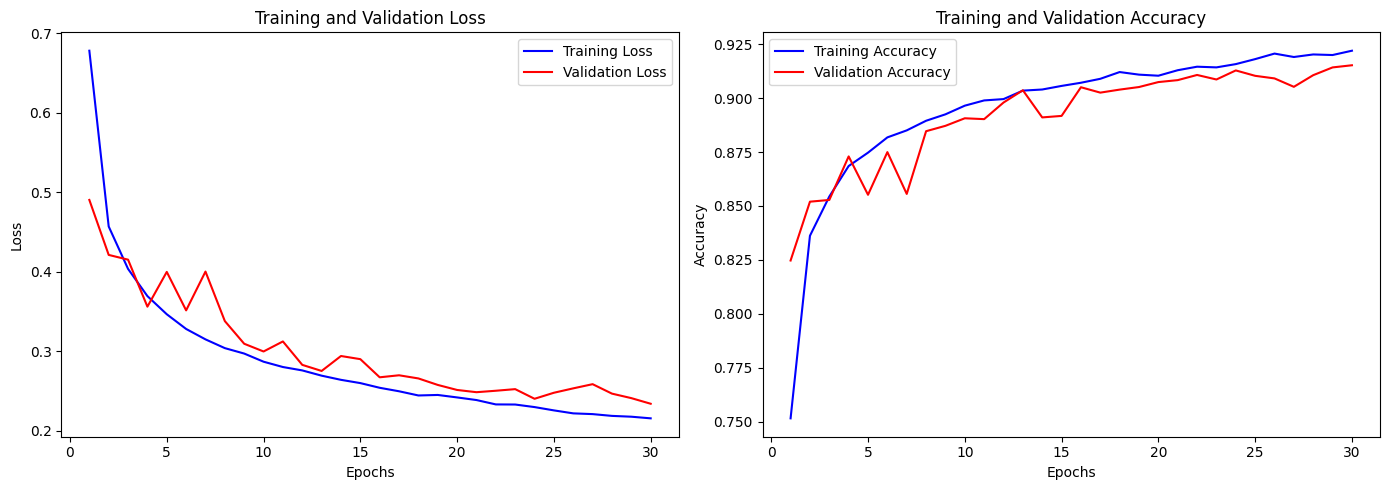

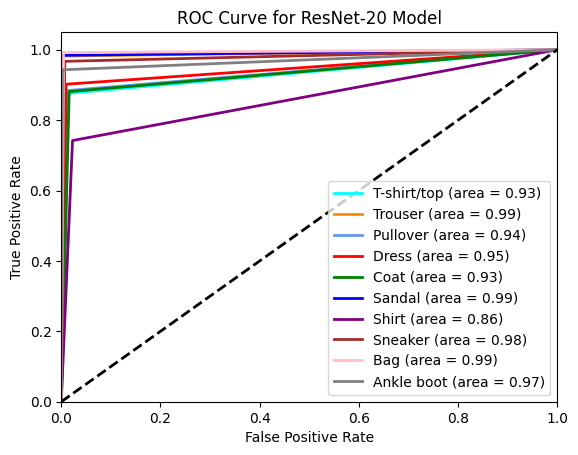

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import pandas as pd
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import torch.nn.functional as F
import numpy as np


# Define a custom Dataset class for Fashion MNIST loaded from a CSV file
class FashionMnistDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file, header=None)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image = row[1:].values.astype(np.uint8).reshape(28, 28)
        image = Image.fromarray(image)  # Convert to PIL Image for transformations
        label = torch.tensor(int(row[0]), dtype=torch.long)
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Residual Block definition
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# ResNet-20 definition
class ResNet20(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet20, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        
        # Stacking Residual Blocks
        self.layer1 = self._make_layer(16, 16, 3, stride=1)
        self.layer2 = self._make_layer(16, 32, 3, stride=2)
        self.layer3 = self._make_layer(32, 64, 3, stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
    
    def _make_layer(self, in_channels, out_channels, blocks, stride):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out

# Define your dataset and data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # ResNet generally works with 32x32 input sizes like CIFAR-10
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
    # Normalize as needed
])

# Instantiate the dataset
train_dataset = FashionMnistDataset(csv_file='fashion_mnist_train.csv', transform=transform)
test_dataset = FashionMnistDataset(csv_file='fashion_mnist_test.csv', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Instantiate the model, define the loss function, and the optimizer
model = ResNet20(num_classes=10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with metric tracking
num_epochs = 30
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
val_precisions = []
val_recalls = []
val_f1_scores = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_train_labels = []
    all_train_predictions = []
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        all_train_labels.extend(labels.cpu().numpy())
        all_train_predictions.extend(predicted.cpu().numpy())
    
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct_predictions / total_predictions
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    # Calculate precision, recall, and F1 score
    train_precision = precision_score(all_train_labels, all_train_predictions, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_predictions, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_predictions, average='weighted')
    
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_val_labels = []
    all_val_predictions = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            all_val_labels.extend(labels.cpu().numpy())
            all_val_predictions.extend(predicted.cpu().numpy())
    
    val_loss = val_running_loss / len(test_loader.dataset)
    val_losses.append(val_loss)
    val_accuracy = correct_predictions / total_predictions
    val_accuracies.append(val_accuracy)
    
    val_precision = precision_score(all_val_labels, all_val_predictions, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_predictions, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_predictions, average='weighted')
    
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, "
          f"Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}")

# Plotting accuracy, loss, precision, recall, and F1 score
# Plotting accuracy and loss
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.tight_layout()
plt.show()



# Class names dictionary
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# ROC Curve plotting
y_test = label_binarize(all_val_labels, classes=range(10))
y_score = label_binarize(all_val_predictions, classes=range(10))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'brown', 'pink', 'grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ResNet-20 Model')
plt.legend(loc="lower right")
plt.show()

### Building a Vision Transformer-model for Fashion mnist Classification

/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


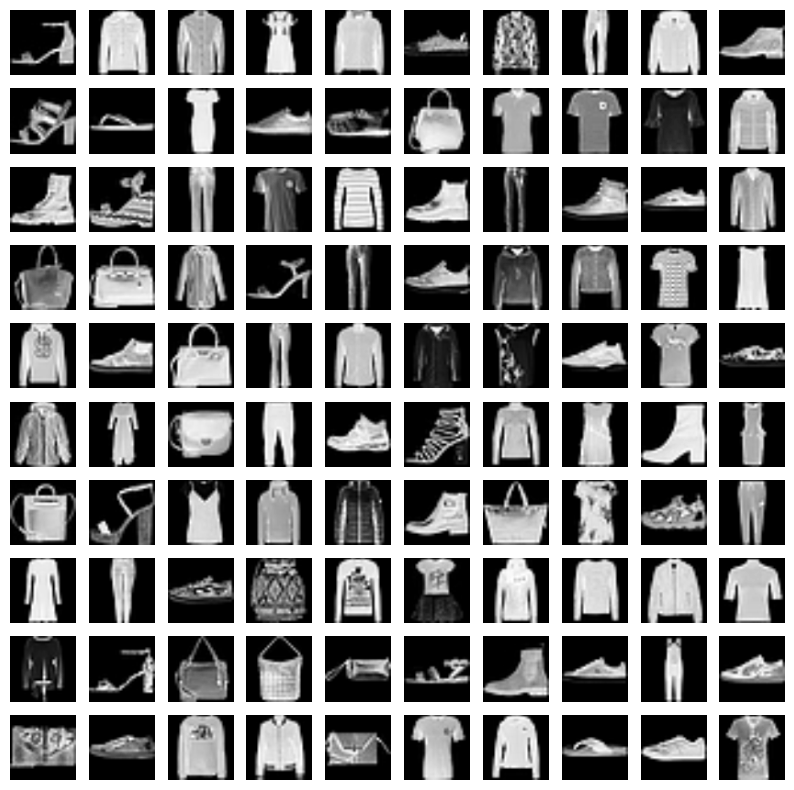

/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 1/30, Train Loss: 0.9392, Train Accuracy: 0.6431, Val Loss: 0.5145, Val Accuracy: 0.8076, Train Precision: 0.6396, Train Recall: 0.6431, Train F1: 0.6396, Val Precision: 0.8138, Val Recall: 0.8076, Val F1: 0.8083


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 2/30, Train Loss: 0.4664, Train Accuracy: 0.8269, Val Loss: 0.4331, Val Accuracy: 0.8405, Train Precision: 0.8250, Train Recall: 0.8269, Train F1: 0.8252, Val Precision: 0.8466, Val Recall: 0.8405, Val F1: 0.8408


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 3/30, Train Loss: 0.4079, Train Accuracy: 0.8489, Val Loss: 0.4123, Val Accuracy: 0.8523, Train Precision: 0.8475, Train Recall: 0.8489, Train F1: 0.8478, Val Precision: 0.8551, Val Recall: 0.8523, Val F1: 0.8528


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 4/30, Train Loss: 0.3747, Train Accuracy: 0.8617, Val Loss: 0.3764, Val Accuracy: 0.8594, Train Precision: 0.8602, Train Recall: 0.8617, Train F1: 0.8606, Val Precision: 0.8617, Val Recall: 0.8594, Val F1: 0.8594


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 5/30, Train Loss: 0.3525, Train Accuracy: 0.8701, Val Loss: 0.3579, Val Accuracy: 0.8698, Train Precision: 0.8691, Train Recall: 0.8701, Train F1: 0.8693, Val Precision: 0.8711, Val Recall: 0.8698, Val F1: 0.8681


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 6/30, Train Loss: 0.3335, Train Accuracy: 0.8755, Val Loss: 0.3509, Val Accuracy: 0.8725, Train Precision: 0.8746, Train Recall: 0.8755, Train F1: 0.8749, Val Precision: 0.8729, Val Recall: 0.8725, Val F1: 0.8700


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 7/30, Train Loss: 0.3126, Train Accuracy: 0.8841, Val Loss: 0.3339, Val Accuracy: 0.8796, Train Precision: 0.8834, Train Recall: 0.8841, Train F1: 0.8836, Val Precision: 0.8801, Val Recall: 0.8796, Val F1: 0.8788


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 8/30, Train Loss: 0.3048, Train Accuracy: 0.8864, Val Loss: 0.3672, Val Accuracy: 0.8713, Train Precision: 0.8856, Train Recall: 0.8864, Train F1: 0.8858, Val Precision: 0.8797, Val Recall: 0.8713, Val F1: 0.8732


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 9/30, Train Loss: 0.2928, Train Accuracy: 0.8921, Val Loss: 0.3354, Val Accuracy: 0.8833, Train Precision: 0.8913, Train Recall: 0.8921, Train F1: 0.8916, Val Precision: 0.8836, Val Recall: 0.8833, Val F1: 0.8830


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 10/30, Train Loss: 0.2814, Train Accuracy: 0.8956, Val Loss: 0.3195, Val Accuracy: 0.8898, Train Precision: 0.8950, Train Recall: 0.8956, Train F1: 0.8952, Val Precision: 0.8899, Val Recall: 0.8898, Val F1: 0.8888


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 11/30, Train Loss: 0.2730, Train Accuracy: 0.8988, Val Loss: 0.3441, Val Accuracy: 0.8851, Train Precision: 0.8981, Train Recall: 0.8988, Train F1: 0.8983, Val Precision: 0.8866, Val Recall: 0.8851, Val F1: 0.8847


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 12/30, Train Loss: 0.2656, Train Accuracy: 0.8998, Val Loss: 0.3145, Val Accuracy: 0.8871, Train Precision: 0.8992, Train Recall: 0.8998, Train F1: 0.8994, Val Precision: 0.8873, Val Recall: 0.8871, Val F1: 0.8865


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 13/30, Train Loss: 0.2523, Train Accuracy: 0.9049, Val Loss: 0.3241, Val Accuracy: 0.8889, Train Precision: 0.9044, Train Recall: 0.9049, Train F1: 0.9045, Val Precision: 0.8904, Val Recall: 0.8889, Val F1: 0.8861


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 14/30, Train Loss: 0.2466, Train Accuracy: 0.9092, Val Loss: 0.3134, Val Accuracy: 0.8911, Train Precision: 0.9087, Train Recall: 0.9092, Train F1: 0.9088, Val Precision: 0.8925, Val Recall: 0.8911, Val F1: 0.8914


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 15/30, Train Loss: 0.2410, Train Accuracy: 0.9096, Val Loss: 0.3152, Val Accuracy: 0.8923, Train Precision: 0.9091, Train Recall: 0.9096, Train F1: 0.9093, Val Precision: 0.8967, Val Recall: 0.8923, Val F1: 0.8932


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 16/30, Train Loss: 0.2333, Train Accuracy: 0.9130, Val Loss: 0.3428, Val Accuracy: 0.8897, Train Precision: 0.9126, Train Recall: 0.9130, Train F1: 0.9128, Val Precision: 0.8892, Val Recall: 0.8897, Val F1: 0.8881


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 17/30, Train Loss: 0.2237, Train Accuracy: 0.9151, Val Loss: 0.3338, Val Accuracy: 0.8870, Train Precision: 0.9146, Train Recall: 0.9151, Train F1: 0.9147, Val Precision: 0.8907, Val Recall: 0.8870, Val F1: 0.8868


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 18/30, Train Loss: 0.2195, Train Accuracy: 0.9175, Val Loss: 0.3087, Val Accuracy: 0.8973, Train Precision: 0.9171, Train Recall: 0.9175, Train F1: 0.9172, Val Precision: 0.8972, Val Recall: 0.8973, Val F1: 0.8969


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 19/30, Train Loss: 0.2168, Train Accuracy: 0.9179, Val Loss: 0.3261, Val Accuracy: 0.8904, Train Precision: 0.9175, Train Recall: 0.9179, Train F1: 0.9176, Val Precision: 0.8929, Val Recall: 0.8904, Val F1: 0.8889


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 20/30, Train Loss: 0.2061, Train Accuracy: 0.9220, Val Loss: 0.3551, Val Accuracy: 0.8899, Train Precision: 0.9216, Train Recall: 0.9220, Train F1: 0.9217, Val Precision: 0.8930, Val Recall: 0.8899, Val F1: 0.8883


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 21/30, Train Loss: 0.2044, Train Accuracy: 0.9213, Val Loss: 0.3127, Val Accuracy: 0.8966, Train Precision: 0.9210, Train Recall: 0.9213, Train F1: 0.9211, Val Precision: 0.8967, Val Recall: 0.8966, Val F1: 0.8959


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 22/30, Train Loss: 0.1976, Train Accuracy: 0.9248, Val Loss: 0.3120, Val Accuracy: 0.8912, Train Precision: 0.9245, Train Recall: 0.9248, Train F1: 0.9246, Val Precision: 0.8935, Val Recall: 0.8912, Val F1: 0.8917


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 23/30, Train Loss: 0.1911, Train Accuracy: 0.9281, Val Loss: 0.3060, Val Accuracy: 0.8954, Train Precision: 0.9278, Train Recall: 0.9281, Train F1: 0.9278, Val Precision: 0.8962, Val Recall: 0.8954, Val F1: 0.8954


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 24/30, Train Loss: 0.1912, Train Accuracy: 0.9276, Val Loss: 0.3537, Val Accuracy: 0.8973, Train Precision: 0.9273, Train Recall: 0.9276, Train F1: 0.9274, Val Precision: 0.8975, Val Recall: 0.8973, Val F1: 0.8969


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 25/30, Train Loss: 0.1828, Train Accuracy: 0.9313, Val Loss: 0.3223, Val Accuracy: 0.9007, Train Precision: 0.9311, Train Recall: 0.9313, Train F1: 0.9311, Val Precision: 0.9003, Val Recall: 0.9007, Val F1: 0.8995


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 26/30, Train Loss: 0.1805, Train Accuracy: 0.9317, Val Loss: 0.3478, Val Accuracy: 0.8965, Train Precision: 0.9314, Train Recall: 0.9317, Train F1: 0.9315, Val Precision: 0.8967, Val Recall: 0.8965, Val F1: 0.8959


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 27/30, Train Loss: 0.1783, Train Accuracy: 0.9334, Val Loss: 0.3216, Val Accuracy: 0.8929, Train Precision: 0.9331, Train Recall: 0.9334, Train F1: 0.9332, Val Precision: 0.8946, Val Recall: 0.8929, Val F1: 0.8930


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 28/30, Train Loss: 0.1706, Train Accuracy: 0.9344, Val Loss: 0.3529, Val Accuracy: 0.8972, Train Precision: 0.9342, Train Recall: 0.9344, Train F1: 0.9343, Val Precision: 0.8974, Val Recall: 0.8972, Val F1: 0.8971


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 29/30, Train Loss: 0.1676, Train Accuracy: 0.9367, Val Loss: 0.3308, Val Accuracy: 0.8976, Train Precision: 0.9365, Train Recall: 0.9367, Train F1: 0.9366, Val Precision: 0.8993, Val Recall: 0.8976, Val F1: 0.8978


/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)
/tmp/ipykernel_7080/55864180.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = torch.tensor(int(row[0]), dtype=torch.long)


Epoch 30/30, Train Loss: 0.1621, Train Accuracy: 0.9384, Val Loss: 0.3570, Val Accuracy: 0.8926, Train Precision: 0.9382, Train Recall: 0.9384, Train F1: 0.9383, Val Precision: 0.8953, Val Recall: 0.8926, Val F1: 0.8932


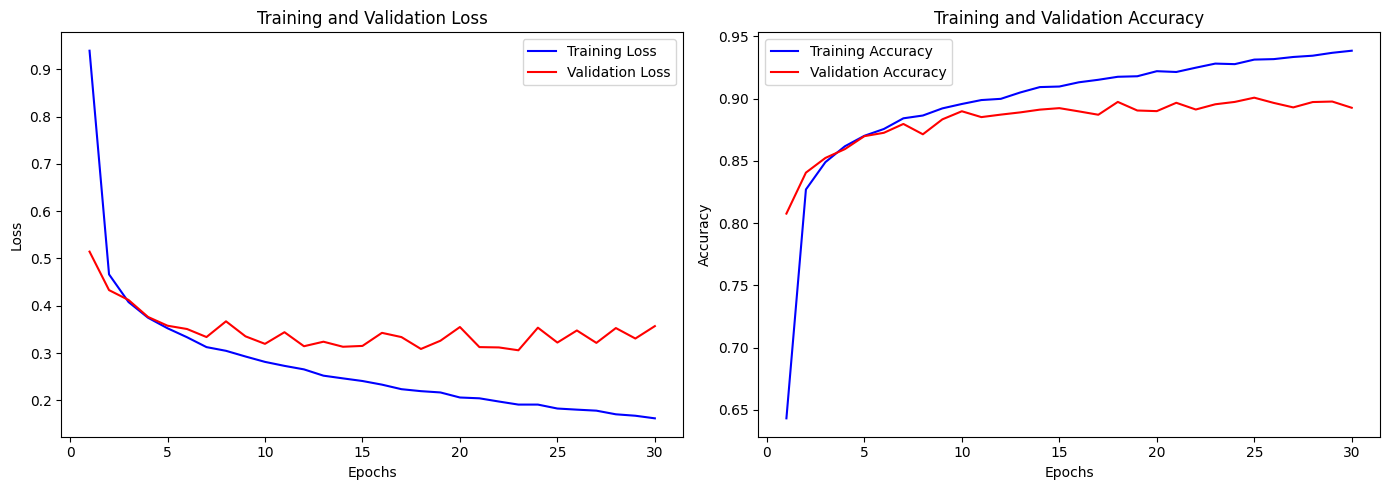

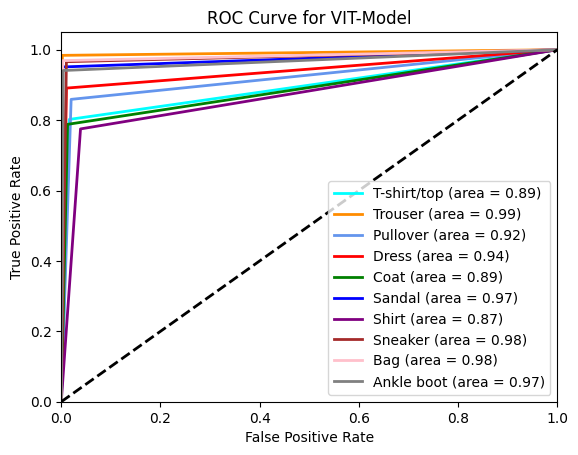

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Configuration class
class Config:
    input_size = 28
    image_size = 72
    patch_size = 6
    num_patches = (image_size // patch_size) ** 2
    projection_dim = 64
    num_heads = 4
    transformer_units = [projection_dim * 2, projection_dim]
    transformer_layers = 8
    mlp_head_units = [2048, 1024]
    num_classes = 10
    batch_size = 256
    learning_rate = 0.001
    weight_decay = 0.0001
    num_epochs = 30
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Helper function to visualize images
def sample_images(images, row_count, column_count):
    fig, axs = plt.subplots(row_count, column_count, figsize=(10,10))
    for i in range(row_count):
        for j in range(column_count):
            axs[i,j].imshow(images[i * column_count + j].squeeze(), cmap='gray')
            axs[i,j].axis('off')
    plt.show()

# Dataset class for Fashion MNIST loaded from CSV files
class FashionMnistDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image = row[1:].values.astype(np.uint8).reshape(28, 28)
        image = Image.fromarray(image)  # Convert to PIL Image
        label = torch.tensor(int(row[0]), dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((Config.image_size, Config.image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = FashionMnistDataset(csv_file='fashion_mnist_train.csv', transform=transform)
test_dataset = FashionMnistDataset(csv_file='fashion_mnist_test.csv', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=Config.batch_size, shuffle=False)

# Visualization of sample images
sample_indices = np.random.choice(len(train_dataset), 100)
sample_images(torch.stack([train_dataset[i][0] for i in sample_indices]), 10, 10)

# Define the Patches layer
class Patches(nn.Module):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size
        
    def forward(self, x):
        batch_size, channels, height, width = x.shape
        patches = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.permute(0, 2, 3, 1, 4, 5).contiguous().view(batch_size, -1, channels * self.patch_size ** 2)
        return patches

# Define the PatchEncoder layer
class PatchEncoder(nn.Module):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.projection = nn.Linear(Config.patch_size * Config.patch_size, projection_dim)
        self.position_embedding = nn.Parameter(torch.randn(1, num_patches, projection_dim))
        
    def forward(self, patches):
        encoded = self.projection(patches)
        encoded += self.position_embedding
        return encoded

# Define the MLP block
class MLP(nn.Module):
    def __init__(self, in_features, hidden_units, dropout_rate):
        super(MLP, self).__init__()
        layers = []
        for units in hidden_units:
            layers.append(nn.Linear(in_features, units))
            layers.append(nn.GELU())
            layers.append(nn.Dropout(dropout_rate))
            in_features = units
        self.mlp = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.mlp(x)

# Define the Transformer block
class TransformerBlock(nn.Module):
    def __init__(self, dim, heads, mlp_dim, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=dim, num_heads=heads, dropout=dropout)
        self.norm1 = nn.LayerNorm(dim)
        self.mlp = MLP(dim, mlp_dim, dropout)
        self.norm2 = nn.LayerNorm(dim)
        
    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        x = x + attn_output
        x = self.norm1(x)
        x = x + self.mlp(x)
        x = self.norm2(x)
        return x

# Define the Vision Transformer model
class VisionTransformer(nn.Module):
    def __init__(self, config):
        super(VisionTransformer, self).__init__()
        self.patches = Patches(config.patch_size)
        self.patch_encoder = PatchEncoder(config.num_patches, config.projection_dim)
        self.transformer = nn.Sequential(
            *[TransformerBlock(config.projection_dim, config.num_heads, config.transformer_units, dropout=0.1)
              for _ in range(config.transformer_layers)]
        )
        self.norm = nn.LayerNorm(config.projection_dim)
        self.mlp_head = MLP(config.projection_dim, config.mlp_head_units, dropout_rate=0.5)
        self.classifier = nn.Linear(config.mlp_head_units[-1], config.num_classes)
        
    def forward(self, x):
        x = self.patches(x)
        x = self.patch_encoder(x)
        x = x.permute(1, 0, 2)  # Required for nn.MultiheadAttention
        x = self.transformer(x)
        x = x.permute(1, 0, 2)  # Convert back to batch-first format
        x = self.norm(x)
        x = x.mean(dim=1)
        x = self.mlp_head(x)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
model = VisionTransformer(Config).to(Config.device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=Config.learning_rate, weight_decay=Config.weight_decay)

# Tracking metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
val_precisions = []
val_recalls = []
val_f1_scores = []

# Training loop
for epoch in range(Config.num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_train_labels = []
    all_train_predictions = []
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(Config.device), labels.to(Config.device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
        all_train_labels.extend(labels.cpu().numpy())
        all_train_predictions.extend(predicted.cpu().numpy())
    
    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_predictions / total_predictions
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Calculate precision, recall, and F1 score
    train_precision = precision_score(all_train_labels, all_train_predictions, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_predictions, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_predictions, average='weighted')
    
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)
    
    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_val_labels = []
    all_val_predictions = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(Config.device), labels.to(Config.device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            all_val_labels.extend(labels.cpu().numpy())
            all_val_predictions.extend(predicted.cpu().numpy())
    
    val_loss = val_running_loss / len(test_loader.dataset)
    val_accuracy = correct_predictions / total_predictions
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    val_precision = precision_score(all_val_labels, all_val_predictions, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_predictions, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_predictions, average='weighted')
    
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    
    print(f"Epoch {epoch + 1}/{Config.num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, "
          f"Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}")

# Plotting accuracy, loss, precision, recall, and F1 score
epochs = range(1, Config.num_epochs + 1)  # Corrected this line to use Config.num_epochs
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# ROC Curve plotting
y_test = label_binarize(all_val_labels, classes=range(10))
y_score = label_binarize(all_val_predictions, classes=range(10))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple', 'brown', 'pink', 'grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VIT-Model')
plt.legend(loc="lower right")
plt.show()

## Comparing Baseline CNN model, with ResNet20 and Vision Transformer 

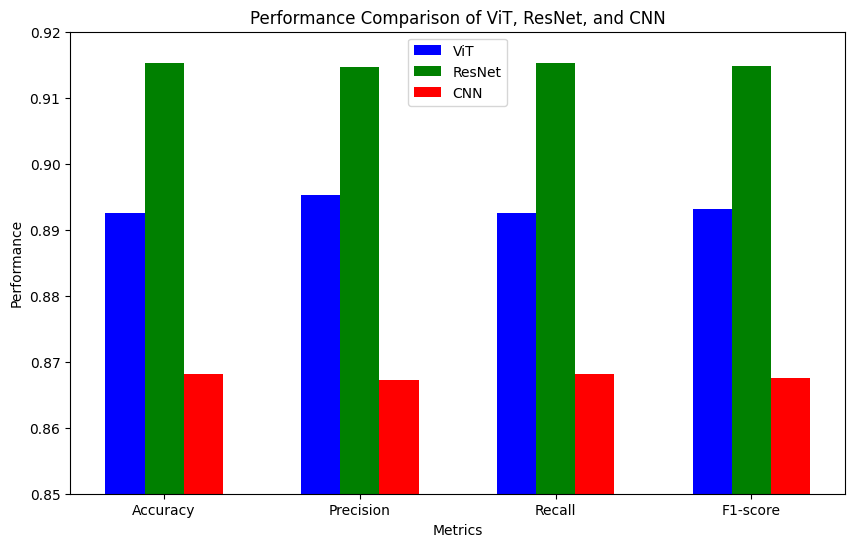

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
ViT_scores = [0.8926, 0.8953, 0.8926, 0.8932]
ResNet_scores = [0.9153, 0.9147, 0.9153, 0.9148]
CNN_scores = [0.8681, 0.8673, 0.8681, 0.8675]


# Number of metrics
n_metrics = len(metrics)

# X-axis positions
x = np.arange(n_metrics)

# Bar width
bar_width = 0.2

# Plotting the bars
plt.figure(figsize=(10, 6))

plt.bar(x, ViT_scores, width=bar_width, label='ViT', color='blue')
plt.bar(x + bar_width, ResNet_scores, width=bar_width, label='ResNet', color='green')
plt.bar(x + 2 * bar_width, CNN_scores, width=bar_width, label='CNN', color='red')

# Adding labels and titles
plt.xlabel('Metrics')
plt.ylabel('Performance')
plt.title('Performance Comparison of ViT, ResNet, and CNN')
plt.xticks(x + bar_width, metrics)
plt.ylim(0.85, 0.92)  # Set a reasonable limit based on your data

# Adding legend
plt.legend()

# Show the plot
plt.show()